# PreProcessing

to impoert the required libraries

In [111]:
import pandas as pd
import fiona
import shapely
import pyproj
import rtree
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from mpl_toolkits.mplot3d import Axes3D

to tead the main data set - data without aggegation (dataset has about 486000 records)

In [102]:
# reading the main dataset - the one without aggregation
main_df=pd.read_csv(r'C:/Users/user/Desktop/BigGeo/main.csv',header=None,
names=["date","block","temp","prec","access","pop","obs","long","lat"])

In [103]:
# size of the main dataset without weekly aggregation
main_df.shape

(486053, 9)

In [104]:
# to add geometry column to the main dataset
geo_main_df = gpd.GeoDataFrame(main_df, geometry=gpd.points_from_xy(main_df.long, main_df.lat))
geo_main_df

,date,block,temp,prec,access,pop,obs,long,lat,geometry
0,2017-01-10,224,7.39723,0.523418,1893.815974,220,1,19,394,POINT (19.000 394.000)
1,2017-01-10,225,7.39834,0.511018,8058.989539,1015,1,19,395,POINT (19.000 395.000)
2,2017-01-10,226,7.39957,0.511445,2204.618362,0,1,19,396,POINT (19.000 396.000)
3,2017-01-10,239,7.36842,0.416638,5226.349332,0,1,20,370,POINT (20.000 370.000)
4,2017-01-10,265,7.39955,0.502335,4806.261296,0,1,20,396,POINT (20.000 396.000)
...,...,...,...,...,...,...,...,...,...,...
486048,2017-06-30,44592,22.54660,10.518500,2358.674812,0,1,205,351,POINT (205.000 351.000)
486049,2017-06-30,44593,22.54050,10.444800,1874.749951,0,1,205,352,POINT (205.000 352.000)
486050,2017-06-30,44596,22.54110,10.325600,1175.554307,0,1,206,351,POINT (206.000 351.000)
486051,2017-06-30,44597,22.53480,10.419100,1973.194695,0,1,206,352,POINT (206.000 352.000)


some quick information about the original dataset

In [105]:
# to describe the main dataset
geo_main_df.describe()

,block,temp,prec,access,pop,obs,long,lat
count,486053.000000,486053.000000,486053.000000,486053.000000,486053.000000,486053.000000,486053.000000,486053.000000
mean,20534.800232,13.837722,1.506892,5787.201976,832.352758,1.448521,153.834201,467.637673
std,12714.240804,6.962132,3.335649,5722.436955,1857.054470,1.558211,57.256739,64.539285
min,60.000000,-3.344500,0.000000,0.000000,0.000000,1.000000,15.000000,308.000000
25%,9554.000000,9.539270,0.000000,1888.676073,5.000000,1.000000,111.000000,422.000000
50%,18518.000000,12.920800,0.000000,3410.820815,40.000000,1.000000,151.000000,457.000000
75%,31303.000000,19.024100,1.318420,7710.971698,570.000000,1.000000,197.000000,507.000000
max,44607.000000,34.993700,53.430100,33998.706770,22830.000000,145.000000,277.000000,612.000000


to create the histogram of the independent variables (temperature, percipitation, accessability, and population density) and dependent variable (observation intensity)

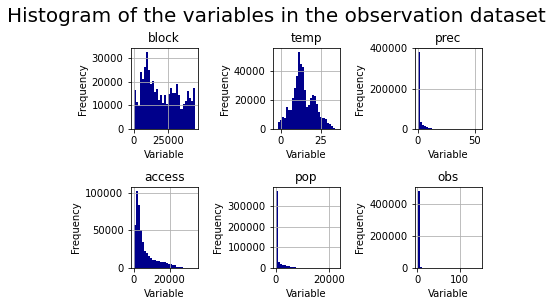

In [106]:
# creting the histogram of the variables in the original table
labels = ["block","temp","prec","access","pop","obs"]
title= plt.suptitle('Histogram of the variables in the observation dataset', size=20)
title.set_position([.5, 1.05])
plt.subplots_adjust(hspace=0.125, wspace=0.125)
for i in range(1, 7):
    current_feature = main_df[labels[i-1]]
    plt.subplot(2, 3, i)
    plt.title(labels[i - 1], size=12)
    plt.hist(current_feature, bins=30, color="darkblue")
    plt.xlabel("Variable", size=10)
    plt.ylabel("Frequency", size=10)
    plt.grid()
    plt.tight_layout()
plt.show()

finding outliers in variables using box plots

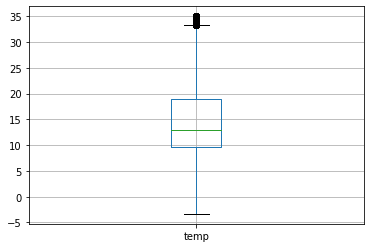

In [107]:
# box plot for independent variables, temprature
main_df.boxplot(column=['temp'])
plt.show()

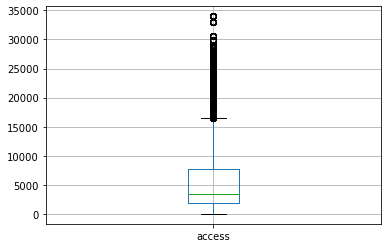

In [108]:
# box plot for independent variables, block accessability
main_df.boxplot(column=['access'])
plt.show()

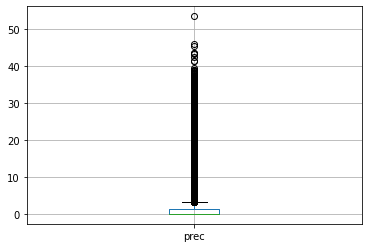

In [109]:
# box plot for independent variables, precipitation
main_df.boxplot(column=['prec'])
plt.show()

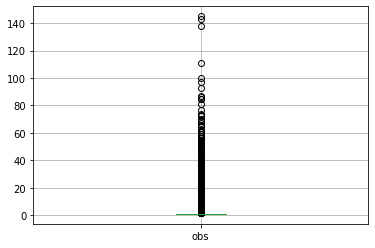

In [110]:
# box plot for dependent variable, observation intensity
main_df.boxplot(column=['obs'])
plt.show()

# Note:
From the initial analysis on the original data set, we found that it's better to aggregate the original dataset to get more variations (specially for the observer density values)
So first we tried a new data frame which is actually main data set aggregated by month
then we created and imported a third data frame which is the main data frame aggregated by week

to import the data that is aggregated by month which is the result of SQL
* the file path has to be replaced
* the file name has to be changed

In [112]:
# to import the main data frame which is actually original data that aggregated by month
monthly_agg=pd.read_csv('/home/jupyter-s2257335/Project/aggregatedByMonth.csv',header=None,
names=["mont","block","pop","tem","prec","acces","obs","long","lat"])
monthly_agg.head()

,mont,block,pop,tem,prec,acces,obs,long,lat
0,Apr,62,30.0,10.805200,0.474744,5180.104665,1,15.0,369.0
1,Apr,63,1700.0,13.588760,0.608041,12690.696440,6,15.0,370.0
2,Apr,64,235.0,10.588937,0.143509,2792.363673,4,15.0,371.0
3,Apr,65,0.0,11.544600,0.000000,2203.429927,1,15.0,372.0
4,Apr,66,140.0,14.993175,0.368394,3407.031524,20,15.0,375.0


In [113]:
# to get some information from the newly imported dataset (aggregated by month)
monthly_agg.describe()

,block,pop,tem,prec,acces,obs,long,lat
count,119352.000000,119352.000000,119352.000000,119352.000000,119352.000000,119352.000000,119352.000000,119352.000000
mean,22446.375620,653.933868,13.680800,1.553749,5255.227232,5.899005,161.976624,468.076161
std,12926.872834,1590.489782,6.845859,2.511550,5213.601392,12.076800,58.415239,67.607935
min,60.000000,0.000000,-3.308890,0.000000,0.000000,1.000000,15.000000,308.000000
25%,10811.750000,5.000000,8.649794,0.000000,1881.650172,1.000000,117.000000,417.000000
50%,22511.000000,35.000000,13.113966,0.700098,3245.810640,3.000000,167.000000,461.000000
75%,33344.000000,340.000000,19.274314,1.990338,6541.246565,6.000000,205.000000,519.000000
max,44607.000000,22830.000000,34.925200,45.335700,33998.706770,490.000000,277.000000,612.000000


In [114]:
# to drop latitude and longitude columns from the monthly aggregated data
monthly_agg.drop(['lat', 'long'], axis=1, inplace=True)
monthly_agg.head()

,mont,block,pop,tem,prec,acces,obs
0,Apr,62,30.0,10.805200,0.474744,5180.104665,1
1,Apr,63,1700.0,13.588760,0.608041,12690.696440,6
2,Apr,64,235.0,10.588937,0.143509,2792.363673,4
3,Apr,65,0.0,11.544600,0.000000,2203.429927,1
4,Apr,66,140.0,14.993175,0.368394,3407.031524,20


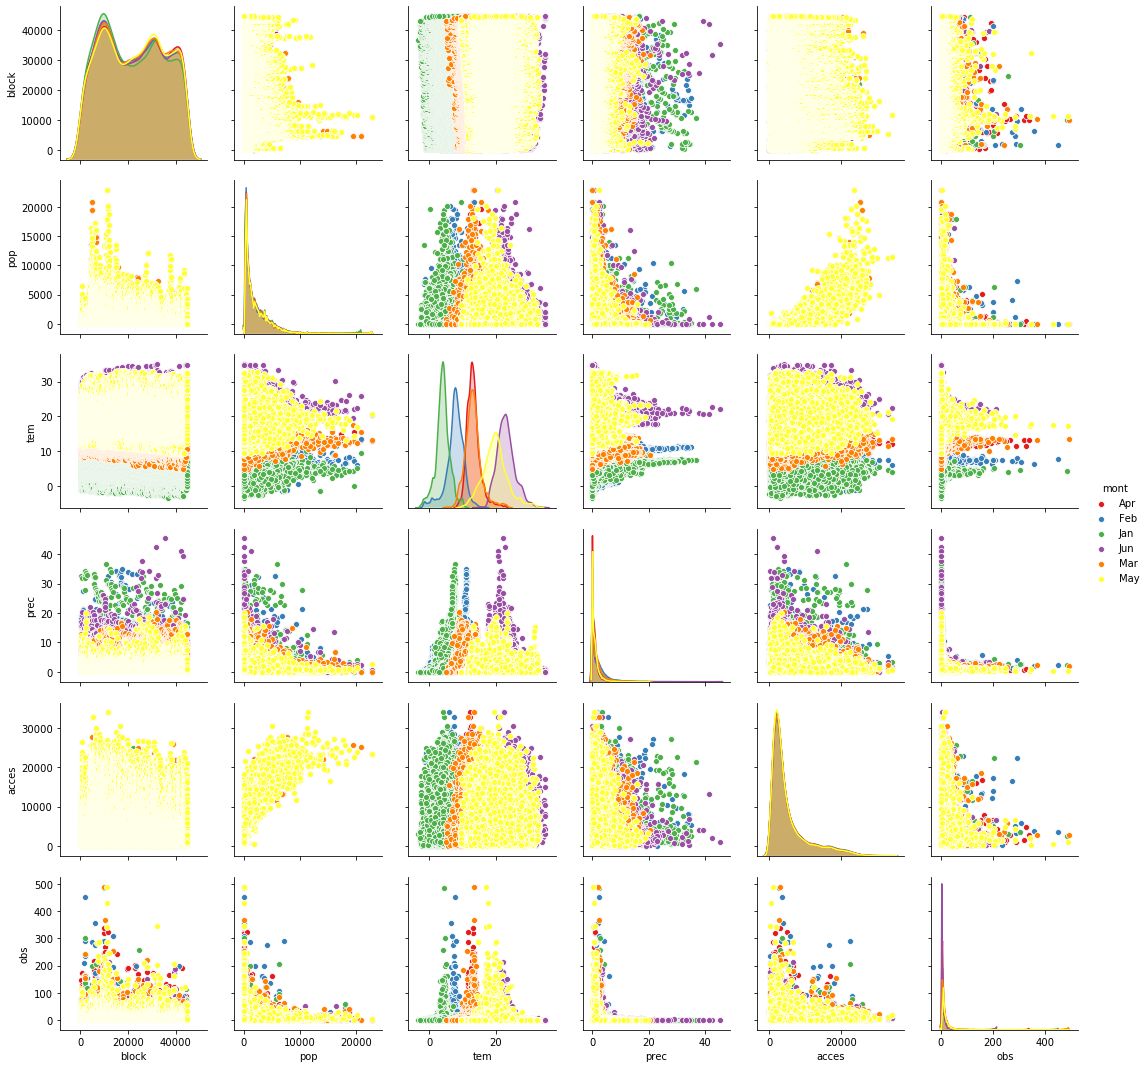

In [115]:
# the pair plot for the monthly aggregted data
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(monthly_agg,hue='mont',palette='Set1')


### to remove aoutliers - weekly aggregated data

to remove the outliers from the weekly aggregated data  ->>
According to the basic definition of IQR outliers, Values less than Q1-1.5*IQR and values greater that Q3+1.5*IQR are treated as outliers. 

In [116]:
# to remove the outliers in the observation coloumn - monthly aggregated data
Q1 =  monthly_agg['obs'].quantile(0.25)
Q3 = monthly_agg['obs'].quantile(0.75)
IQR = Q3 - Q1
monthly_agg_o = monthly_agg.drop(monthly_agg[(monthly_agg['obs'] < Q1-1.5*IQR ) | (monthly_agg['obs'] > Q3+1.5*IQR)].index)

In [117]:
# to remove the outliers from the temprature coloumn - monthly aggregated data
Q1 =  monthly_agg_o['tem'].quantile(0.25)
Q3 = monthly_agg_o['tem'].quantile(0.75)
IQR = Q3 - Q1
monthly_agg_o_t = monthly_agg_o.drop(monthly_agg_o[(monthly_agg_o['tem'] < Q1-1.5*IQR ) | (monthly_agg_o['tem'] > Q3+1.5*IQR)].index)


In [118]:
# to remove the outliers from the pop coloumn - monthly aggregated data
Q1 =  monthly_agg_o_t['pop'].quantile(0.25)
Q3 = monthly_agg_o_t['pop'].quantile(0.75)
IQR = Q3 - Q1
monthly_agg_o_t_p = monthly_agg_o_t.drop(monthly_agg_o_t[(monthly_agg_o_t['pop'] < Q1-1.5*IQR ) | (monthly_agg_o_t['pop'] > Q3+1.5*IQR)].index)

In [119]:
# to remove the outliers from the accessability coloumn - monthly aggregated data
Q1 =  monthly_agg_o_t_p['acces'].quantile(0.25)
Q3 = monthly_agg_o_t_p['acces'].quantile(0.75)
IQR = Q3 - Q1
monthly_agg_o_t_p_a = monthly_agg_o_t_p.drop(monthly_agg_o_t_p[(monthly_agg_o_t_p['acces'] < Q1-1.5*IQR ) | (monthly_agg_o_t_p['acces'] > Q3+1.5*IQR)].index)


In [120]:
# to remove the outliers from the precipitation  coloumn - monthly aggregated data
Q1 =  monthly_agg_o_t_p_a['prec'].quantile(0.25)
Q3 = monthly_agg_o_t_p_a['prec'].quantile(0.75)
IQR = Q3 - Q1
monthly_agg_o_t_p_a_p = monthly_agg_o_t_p_a.drop(monthly_agg_o_t_p_a[(monthly_agg_o_t_p_a['prec'] < Q1-1.5*IQR ) | (monthly_agg_o_t_p_a['prec'] > Q3+1.5*IQR)].index)


box plots of variables after removal of uotliers - weekly aggregated data

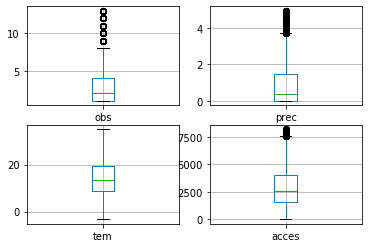

In [121]:
# box mapa after outliers removal
plt.subplot(2, 2, 1)
monthly_agg_o_t_p_a_p.boxplot(column=['obs'])
plt.subplot(2, 2, 2)
monthly_agg_o_t_p_a_p.boxplot(column=['prec'])
plt.subplot(2, 2, 3)
monthly_agg_o_t_p_a_p.boxplot(column=['tem'])
plt.subplot(2, 2, 4)
monthly_agg_o_t_p_a_p.boxplot(column=['acces'])
plt.show()

### monthly aggregated observation intensity data - Including outliers
Regression model Using random forest
independent variables ->> population, percipitation, temprature, and accessibility (road density)

[[30.0 10.8052 0.47474399999999994 5180.104665]
 [1700.0 13.58876 0.6080406 12690.69644]
 [235.0 10.588936666666699 0.143508666666667 2792.363673]
 ...
 [80.0 22.7001 1.6675771111111102 854.6989421]
 [0.0 19.427955555555602 0.591038666666666 2898.42367]
 [0.0 20.114675 1.10475675 2752.5923420000004]]
(119352, 4) (119352,)
(83546, 4) (35806, 4)
(83546,) (35806,)
RF01:  0.17
[0.09163782 0.29610085 0.3596474  0.25261393]
['Population', 'Temperature', 'Precipitation', 'Accessibility']


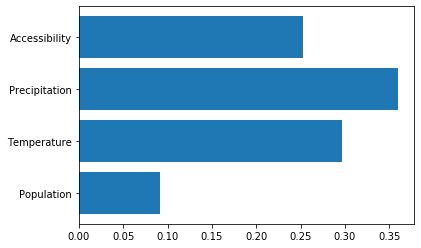

In [122]:
with_outliers_mont_ag = monthly_agg.values
Y = with_outliers_mont_ag[:,-1]
X = with_outliers_mont_ag[:,2:6]
print(X)

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X.shape, Y.shape)
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)
rf = RandomForestRegressor(n_estimators=100, criterion="mse", max_depth=None, max_features="sqrt", bootstrap=True, min_samples_split=2, n_jobs=1)
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)
r2 = round(r2_score(ytest, ypred), 2)
print("RF01: ", r2)
Feature_impo = list()
labels = ["Population","Temperature", "Precipitation", "Accessibility" ]
Feature_impo = rf.feature_importances_
print(Feature_impo)
print(labels)
plt.barh(labels, Feature_impo)
plt.show()

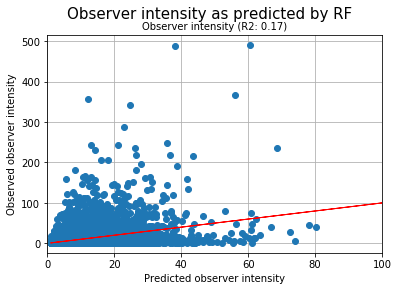

In [123]:
plt.suptitle("Observer intensity as predicted by RF", size=15)

# plt.subplot(1, 2, 1)
plt.title("Observer intensity (R2: {0})".format(r2), size=10)
plt.plot(ypred, ytest, "o")
plt.plot(ypred, ypred, "r-", linewidth=1)
plt.xlabel("Predicted observer intensity", size=10)
plt.ylabel("Observed observer intensity", size=10)
plt.xlim(0, 100)
plt.grid()

In [124]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

Mean Absolute Error: 4.531208177400436
Mean Squared Error: 122.89771099257108
Root Mean Squared Error: 11.08592400265179


### monthly aggregated observation intensity data - After Removing outliers
Regression model Using random forest
independent variables ->> population, percipitation, temprature, and accessibility (road density)

[[30.0 10.8052 0.47474399999999994 5180.104665]
 [235.0 10.588936666666699 0.143508666666667 2792.363673]
 [0.0 11.5446 0.0 2203.429927]
 ...
 [80.0 22.7001 1.6675771111111102 854.6989421]
 [0.0 19.427955555555602 0.591038666666666 2898.42367]
 [0.0 20.114675 1.10475675 2752.5923420000004]]
(77971, 4) (77971,)
(54579, 4) (23392, 4)
(54579,) (23392,)
RF01:  0.21
[0.09664913 0.286112   0.3875778  0.22966106]
['Population', 'Temperature', 'Precipitation', 'Accessibility']


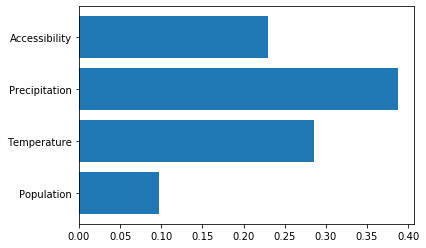

In [125]:
without_outliers_mont_ag = monthly_agg_o_t_p_a_p.values
Y = without_outliers_mont_ag[:,-1]
X = without_outliers_mont_ag[:,2:6]
print(X)

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X.shape, Y.shape)
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)
rf = RandomForestRegressor(n_estimators=100, criterion="mse", max_depth=None, max_features="sqrt", bootstrap=True, min_samples_split=2, n_jobs=1)
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)
r2 = round(r2_score(ytest, ypred), 2)
print("RF01: ", r2)
Feature_impo = list()
labels = ["Population","Temperature", "Precipitation", "Accessibility" ]
Feature_impo = rf.feature_importances_
print(Feature_impo)
print(labels)
plt.barh(labels, Feature_impo)
plt.show()

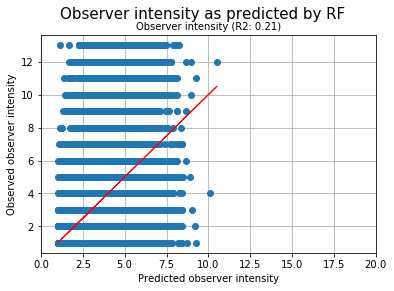

In [126]:
plt.suptitle("Observer intensity as predicted by RF", size=15)

# plt.subplot(1, 2, 1)
plt.title("Observer intensity (R2: {0})".format(r2), size=10)
plt.plot(ypred, ytest, "o")
plt.plot(ypred, ypred, "r-", linewidth=1)
plt.xlabel("Predicted observer intensity", size=10)
plt.ylabel("Observed observer intensity", size=10)
plt.xlim(0, 20)
plt.grid()

# Weekly Aggregated dataset

In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

Mean Absolute Error: 1.842076778385773
Mean Squared Error: 6.454977308481532
Root Mean Squared Error: 2.5406647375207796


to import the weekly aggregated dataset

In [98]:
# to read the aggregated by week data
week_agg=pd.read_csv('/home/jupyter-s2257335/Project/AggregateWeek.csv',header=None,
names=["week","block","pop","acces","tem","prec","obs","long","lat"])
week_agg.head()

,week,block,pop,acces,tem,prec,obs,long,lat
0,2,90,0,2260.122661,1.130620,3.47074,1,16,367
1,2,92,5,4233.326446,0.241198,10.06000,1,16,369
2,2,123,0,1777.878988,0.279730,10.08960,1,17,367
3,2,124,5,1493.392298,1.116320,3.48603,1,17,368
4,2,157,0,1978.480699,0.325152,10.12240,1,18,365


In [99]:
#  to drop lat ant long columns from aggregate week table
week_agg.drop(['lat','long'], axis='columns', inplace=True)
week_agg.head()

,week,block,pop,acces,tem,prec,obs
0,2,90,0,2260.122661,1.130620,3.47074,1
1,2,92,5,4233.326446,0.241198,10.06000,1
2,2,123,0,1777.878988,0.279730,10.08960,1
3,2,124,5,1493.392298,1.116320,3.48603,1
4,2,157,0,1978.480699,0.325152,10.12240,1


Plot pairwise relationships in the weekly aggregated dataset 

/opt/tljh/user/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/tljh/user/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


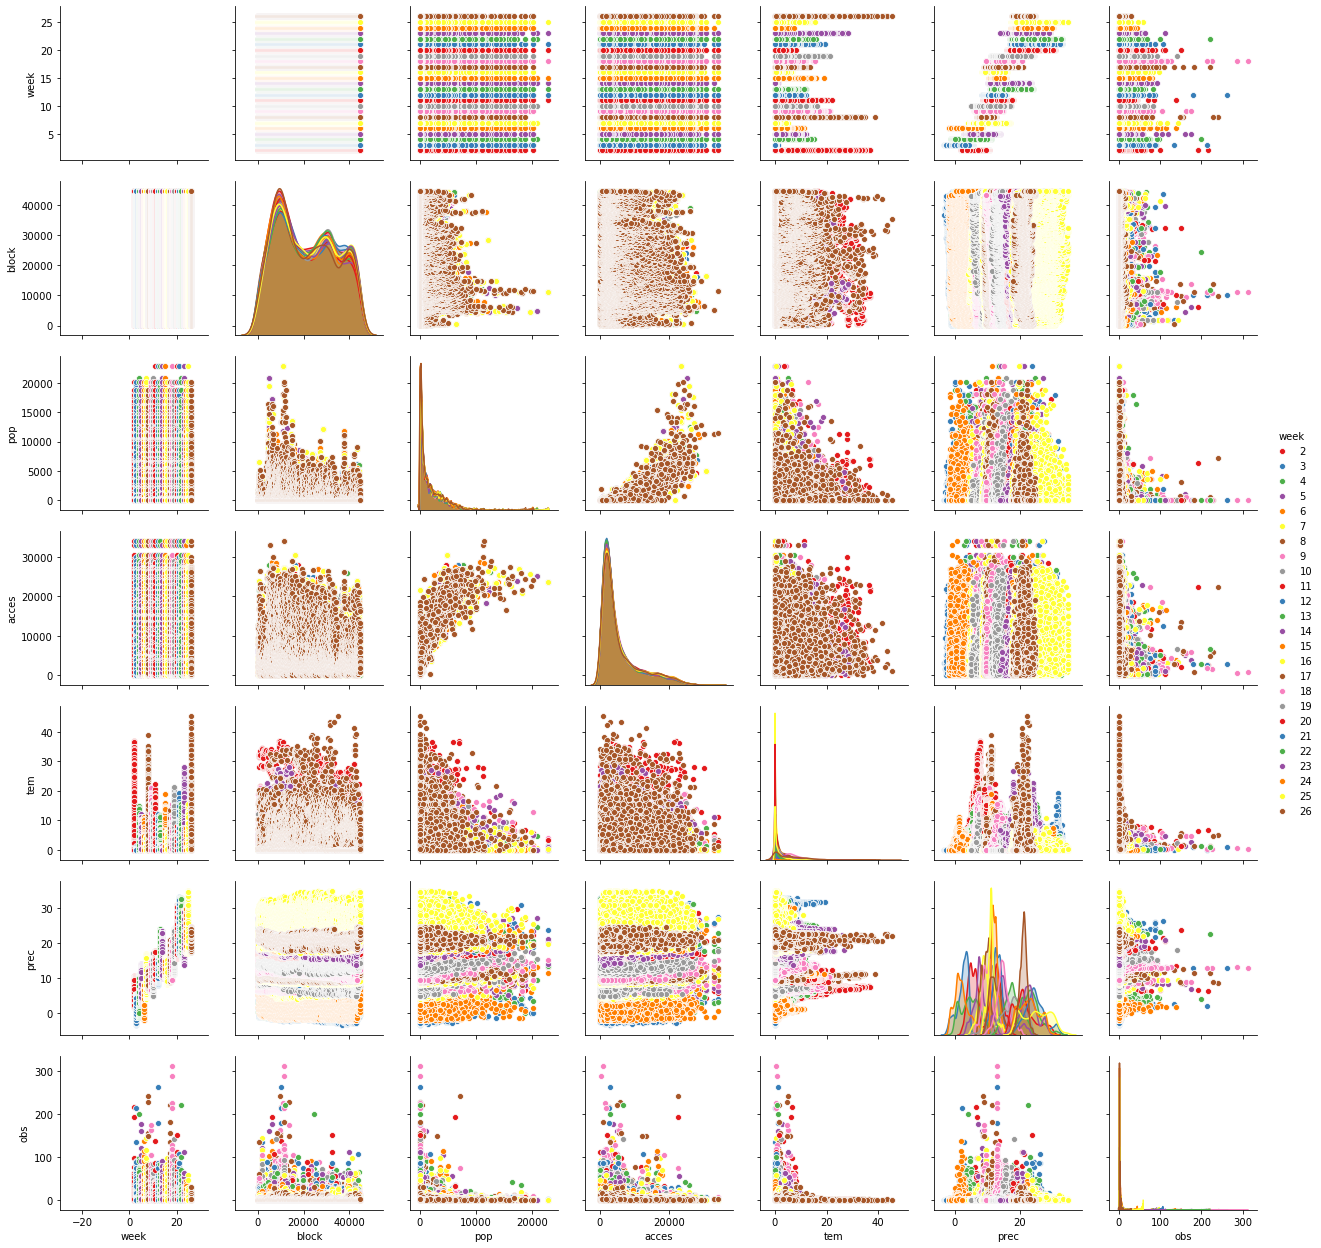

In [100]:
sns.pairplot(week_agg,hue='week',palette='Set1')
plt.show()

### to remove aoutliers - weekly aggregated data

to remove the outliers from the weekly aggregated data  ->>
According to the basic definition of IQR outliers, Values less than Q1-1.5*IQR and values greater that Q3+1.5*IQR are treated as outliers. 

In [101]:
# to remove the outliers in the observation coloumn - weekly aggregated data
Q1 =  week_agg['obs'].quantile(0.25)
Q3 = week_agg['obs'].quantile(0.75)
IQR = Q3 - Q1
week_agg_o = week_agg.drop(week_agg[(week_agg['obs'] < Q1-1.5*IQR ) | (week_agg['obs'] > Q3+1.5*IQR)].index)

In [102]:
# to remove the outliers from the temprature coloumn - weekly aggregated data
Q1 =  week_agg_o['tem'].quantile(0.25)
Q3 = week_agg_o['tem'].quantile(0.75)
IQR = Q3 - Q1
week_agg_o_t = week_agg_o.drop(week_agg_o[(week_agg_o['tem'] < Q1-1.5*IQR ) | (week_agg_o['tem'] > Q3+1.5*IQR)].index)


In [103]:
# to remove the outliers from the population coloumn - weekly aggregated data
Q1 =  week_agg_o_t['pop'].quantile(0.25)
Q3 = week_agg_o_t['pop'].quantile(0.75)
IQR = Q3 - Q1
week_agg_o_t_p = week_agg_o_t.drop(week_agg_o_t[(week_agg_o_t['pop'] < Q1-1.5*IQR ) | (week_agg_o_t['pop'] > Q3+1.5*IQR)].index)


In [104]:
# to remove the outliers from the accessability  coloumn - weekly aggregated data
Q1 =  week_agg_o_t_p['acces'].quantile(0.25)
Q3 = week_agg_o_t_p['acces'].quantile(0.75)
IQR = Q3 - Q1
week_agg_o_t_p_a = week_agg_o_t_p.drop(week_agg_o_t_p[(week_agg_o_t_p['acces'] < Q1-1.5*IQR ) | (week_agg_o_t_p['acces'] > Q3+1.5*IQR)].index)


In [105]:
# to remove the outliers from the precipitation  coloumn - weekly aggregated data
Q1 =  week_agg_o_t_p_a['prec'].quantile(0.25)
Q3 = week_agg_o_t_p_a['prec'].quantile(0.75)
IQR = Q3 - Q1
week_agg_o_t_p_a_p = week_agg_o_t_p_a.drop(week_agg_o_t_p_a[(week_agg_o_t_p_a['prec'] < Q1-1.5*IQR ) | (week_agg_o_t_p_a['prec'] > Q3+1.5*IQR)].index)


box plots of variables after removal of uotliers - weekly aggregated data

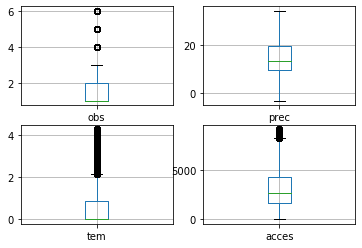

In [106]:
# box mapa after outliers removal
plt.subplot(2, 2, 1)
week_agg_o_t_p_a_p.boxplot(column=['obs'])
plt.subplot(2, 2, 2)
week_agg_o_t_p_a_p.boxplot(column=['prec'])
plt.subplot(2, 2, 3)
week_agg_o_t_p_a_p.boxplot(column=['tem'])
plt.subplot(2, 2, 4)
week_agg_o_t_p_a_p.boxplot(column=['acces'])
plt.show()

### weekly aggregated observation intensity data - including outliers
Regression model Using random forest
independent variables ->> population, percipitation, temprature, and accessibility (road density)

In [107]:
with_outliers_weekly = week_agg.values
Y = with_outliers_weekly[:,-1]
X = with_outliers_weekly[:,2:6]
print(X)

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X.shape, Y.shape)
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

[[0.00000000e+00 2.26012266e+03 1.13062000e+00 3.47074000e+00]
 [5.00000000e+00 4.23332645e+03 2.41198000e-01 1.00600000e+01]
 [0.00000000e+00 1.77787899e+03 2.79730000e-01 1.00896000e+01]
 ...
 [0.00000000e+00 1.59809008e+03 2.84535350e+00 2.22540000e+01]
 [0.00000000e+00 7.20394577e+02 5.32839900e+00 2.24120000e+01]
 [0.00000000e+00 1.82818732e+03 3.21886500e+00 2.30769000e+01]]
(262098, 4) (262098,)
(183468, 4) (78630, 4)
(183468,) (78630,)


RF01:  0.13
[0.08650092 0.29975493 0.28802985 0.32571431]
['Population', 'Accessibility', 'Temperature', 'Precipitation']


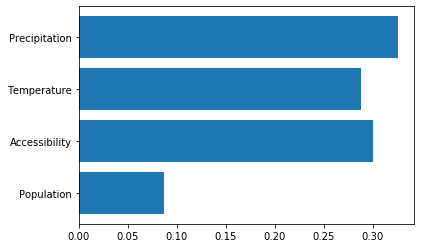

In [108]:
# ML
rf = RandomForestRegressor(n_estimators=100, criterion="mse", max_depth=None, max_features="sqrt", bootstrap=True, min_samples_split=2, n_jobs=1)
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)
r2 = round(r2_score(ytest, ypred), 2)
print("RF01: ", r2)
Feature_impo = list()
labels = ["Population", "Accessibility", "Temperature", "Precipitation" ]
Feature_impo = rf.feature_importances_
print(Feature_impo)
print(labels)
plt.barh(labels, Feature_impo)
plt.show()

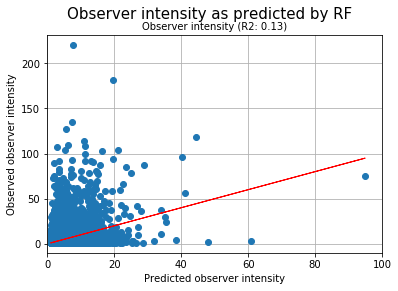

In [109]:
plt.suptitle("Observer intensity as predicted by RF", size=15)

# plt.subplot(1, 2, 1)
plt.title("Observer intensity (R2: {0})".format(r2), size=10)
plt.plot(ypred, ytest, "o")
plt.plot(ypred, ypred, "r-", linewidth=1)
plt.xlabel("Predicted observer intensity", size=10)
plt.ylabel("Observed observer intensity", size=10)
plt.xlim(0, 100)
plt.grid()

In [110]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

Mean Absolute Error: 1.8154003560981813
Mean Squared Error: 16.17108701386239
Root Mean Squared Error: 4.021329010894581


### weekly aggregated observation intensity data - After removing outliers
Regression model Using random forest
independent variables ->> population, percipitation, temprature, and accessibility (road density)

In [80]:
without_outliers_weekly = week_agg_o_t_p_a_p.values
Y = without_outliers_weekly[:,-1]
X = without_outliers_weekly[:,2:6]
print(X)

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X.shape, Y.shape)
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

[[0.00000000e+00 2.26012266e+03 1.13062000e+00 3.47074000e+00]
 [5.00000000e+00 4.23332645e+03 2.41198000e-01 1.00600000e+01]
 [0.00000000e+00 1.77787899e+03 2.79730000e-01 1.00896000e+01]
 ...
 [1.00000000e+01 3.70547675e+03 3.61402000e-01 2.23047000e+01]
 [0.00000000e+00 1.59809008e+03 2.84535350e+00 2.22540000e+01]
 [0.00000000e+00 1.82818732e+03 3.21886500e+00 2.30769000e+01]]
(168105, 4) (168105,)
(117673, 4) (50432, 4)
(117673,) (50432,)


RF01:  0.08
[0.10532733 0.29895129 0.23721546 0.35850592]
['Population', 'Accessibility', 'Temperature', 'Precipitation']


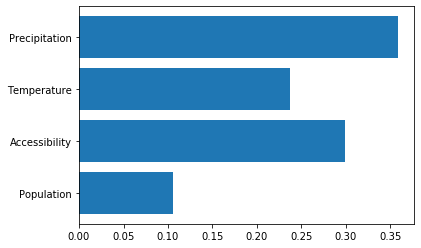

In [81]:
# ML
rf = RandomForestRegressor(n_estimators=100, criterion="mse", max_depth=None, max_features="sqrt", bootstrap=True, min_samples_split=2, n_jobs=1)
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)
r2 = round(r2_score(ytest, ypred), 2)
print("RF01: ", r2)
Feature_impo = list()
labels = ["Population", "Accessibility", "Temperature", "Precipitation" ]
Feature_impo = rf.feature_importances_
print(Feature_impo)
print(labels)
plt.barh(labels, Feature_impo)
plt.show()

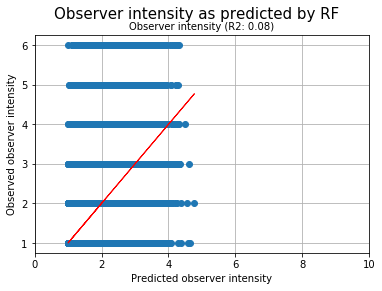

In [87]:
plt.suptitle("Observer intensity as predicted by RF", size=15)

# plt.subplot(1, 2, 1)
plt.title("Observer intensity (R2: {0})".format(r2), size=10)
plt.plot(ypred, ytest, "o")
plt.plot(ypred, ypred, "r-", linewidth=1)
plt.xlabel("Predicted observer intensity", size=10)
plt.ylabel("Observed observer intensity", size=10)
plt.xlim(0, 10)
plt.grid()

In [86]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

Mean Absolute Error: 0.9087793464467004
Mean Squared Error: 1.4786845970812181
Root Mean Squared Error: 1.2160117586114116
